# Customer Analysis Case

## **Libraries:**

In [139]:
#libraries
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
from numpy import random
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

## Content notes:

### Files relative paths:

In [2]:
file1 = "file1.csv"
file2 = "file2.csv"
file3 = "Data_Marketing_Customer_Analysis_Round2.csv"

## **Functions:**

### Get data:

In [3]:
#### read a file:
def get_data_set(file1):             
    return pd.read_csv(file1)

#### combine with dataframe from file2:
def concat_data_set2(data): 
    df2 = pd.read_csv("file2.csv")
    return pd.concat([data,df2])

    

#### merging (outer join) with file3
def merge_for_time_values(data):
    df3 = pd.read_csv("Data_Marketing_Customer_Analysis_Round2.csv")
    df3.rename(
        columns={
        "Customer":"customer",
        "Response":"response",
        "Coverage":"coverage",
        "Effective To Date":"effective_to_date",
        "EmploymentStatus":"employment_status",
        "Number of Policies":"number_of_policies",
        "Policy":"policy",
        "Renew Offer Type":"renew_offer_type",
        "Sales Channel":"sales_channel",
        "Vehicle Size":"vehicle_size",
        "State": "state",
        "Customer Lifetime Value": "customer_lifetime_value",
        "Education": "education",
        "Gender": "gender",
        "Income": "income",
        "Location Code": "location_code",
        "Marital Status": "marital_status",
        "Monthly Premium Auto": "monthly_premium_auto",
        "Months Since Last Claim": "months_since_last_claim",
        "Months Since Policy Inception": "months_since_last_policy_inception",
        "Number of Open Complaints": "number_of_open_complaints",
        "Policy Type": "policy_type",
        "Total Claim Amount": "total_claim_amount",
        "Vehicle Class": "vehicule_class",
        "Vehicle Type": "vehicule_type"
        }, inplace=True
    )
    data = pd.merge(data,df3, on=(
        ["customer",
        "state",
        "gender",
        "education",
        "customer_lifetime_value",
        "income",
        "monthly_premium_auto",
        "number_of_open_complaints",
        "policy_type",
        "vehicule_class",
        "total_claim_amount",
        ]
    ),
                    how="outer", indicator=True)
    return data

### Data cleaning:

In [103]:
### removing duplicates:
def remove_duplicates(data):
    return data.drop_duplicates()

### renaming columns
def rename_columns(data):
    return data.rename(
        columns={"Customer":"customer",
        "ST":"state",
        "GENDER":"gender",
        "Education":"education",
        "Customer Lifetime Value":"customer_lifetime_value",
        "Monthly Premium Auto":"monthly_premium_auto",
        "Income":"income",
        "Number of Open Complaints":"number_of_open_complaints",
        "Policy Type":"policy_type",
        "Vehicle Class":"vehicule_class",
        "Total Claim Amount":"total_claim_amount"
                }
    )


### cleaning up state names
def clean_up_states(data):
    dict = {
        "Oregon": "OR",
        "California": "CA",
        "Arizona": "AZ",
        "Nevada": "NV",
        "Washington": "WA",
        "Cali": "CA"
        }
    return data.replace({"state": dict})


### droping all rows which have only Nan values
def drop_full_nan(data):
    return data.dropna(axis=0, how="all")

### stardardizing gender column
def standardize_gender_values(data):
    dict = {
        "Male": "M",
        "female": "F",
        "Femal": "F",
        }
    return data.replace({"gender": dict})


### stardardizing education column
def standardize_education_values(data):
    dict = {
        "Bachelors": "Bachelor",
        }
    return data.replace({"education": dict})


### removing % character from the customer_lifetime_value_column
def remove_percent(data):
    data["customer_lifetime_value"] = data["customer_lifetime_value"].str.replace("%","")
    return data

### setting the customer_lifetime_value column to numeric type
def set_cslifetimevalue_to_numeric(data):
    data["customer_lifetime_value"] = pd.to_numeric(data["customer_lifetime_value"], errors = "coerce")
    return data

### replacing the number_of_open_complaints columns with a new column with the correct values
def number_of_open_complaints_cleanup(data):
    data["number_of_open_complaints"] = data["number_of_open_complaints"].str[2]
    return data


### setting the number_of_open_complaints column to numeric type
def set_nbofopencomplaints_to_numeric(data):
    data["number_of_open_complaints"] = pd.to_numeric(data["number_of_open_complaints"], errors = "coerce")
    return data


### rounding-up total_claim_amount_column
def roundup_total_claim_amount(data):
    data["total_claim_amount"] = data["total_claim_amount"].round(decimals=2)
    return data

### replacing NaN values of gender column with "missing" and by the mean for customer_lifetime_value
def replace_nan_values(data):
    data["gender"] = data["gender"].fillna("missing")
    data["customer_lifetime_value"] = data["customer_lifetime_value"].fillna(data["customer_lifetime_value"].mean()).round(decimals=2)
    return data


### bucketing states per region
def states_buckets(data):
    dict = {
        "CA": "West Region",
        "OR": "North West",
        "WA": "East",
        "AZ": "Central",
        "NV":  "Central",
        }
    data.insert(2,"region",data["state"])
    data.replace({"region": dict}, inplace=True)
    return data


### setting effective_to_date column to datetime type
def set_time_column_to_datetime(data):
    data["effective_to_date"] = pd.to_datetime(data["effective_to_date"])
    return data


### extracting month from the effective_tot_date column into a new column names "month"
def extract_month(data):
    data.insert(16, "month", pd.DatetimeIndex(data['effective_to_date']).month)
    return data


### Drop the rows where at least one element is missing in state column
def drop_rows_with_nan_in_state(data):
    data.dropna(subset=["state"], inplace=True)
    return data

### Drop the rows where at least one element is missing in number_of_open_complaints
def drop_rows_with_nan_in_open_complaints(data):
    data.dropna(subset=["number_of_open_complaints"], inplace=True)
    return data

In [80]:
data[data["months_since_last_claim"].isnull()]

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicule_class,...,marital_status,months_since_last_claim,months_since_last_policy_inception,number_of_policies,policy,renew_offer_type,sales_channel,vehicle_size,vehicule_type,_merge
0,RB50392,WA,missing,Master,7.802640e+05,0.0,1000.0,0.0,Personal Auto,Four-Door Car,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,QZ44356,AZ,F,Bachelor,6.979536e+05,0.0,94.0,0.0,Personal Auto,Four-Door Car,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,AI49188,NV,F,Bachelor,1.288743e+06,48767.0,108.0,0.0,Personal Auto,Two-Door Car,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,WW63253,CA,M,Bachelor,7.645862e+05,0.0,106.0,0.0,Corporate Auto,SUV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,GA49547,WA,M,High School or Below,5.363077e+05,36357.0,68.0,0.0,Personal Auto,Four-Door Car,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,AP56340,Washington,M,Bachelor,5.384672e+03,13103.0,72.0,NaN,Personal Auto,Four-Door Car,...,Married,NaN,32.0,7.0,Personal L2,Offer1,Agent,Medsize,A,right_only
12880,AW71157,California,M,College,5.531724e+03,50097.0,71.0,NaN,Personal Auto,Four-Door Car,...,Divorced,NaN,81.0,5.0,Personal L1,Offer3,Web,Medsize,A,right_only
12897,OQ99704,Washington,F,Bachelor,3.981776e+03,52801.0,100.0,NaN,Personal Auto,SUV,...,Married,NaN,78.0,1.0,Personal L3,Offer2,Branch,Small,A,right_only
12898,FU99476,Washington,M,High School or Below,6.770307e+03,74422.0,85.0,NaN,Personal Auto,Four-Door Car,...,Divorced,NaN,3.0,3.0,Personal L1,Offer1,Call Center,Medsize,A,right_only


### Data set description:

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12343 entries, 0 to 12972
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   customer                            12343 non-null  object        
 1   state                               12343 non-null  object        
 2   region                              12343 non-null  object        
 3   gender                              12343 non-null  object        
 4   education                           12343 non-null  object        
 5   customer_lifetime_value             12343 non-null  float64       
 6   income                              12343 non-null  float64       
 7   monthly_premium_auto                12343 non-null  float64       
 8   number_of_open_complaints           11752 non-null  float64       
 9   policy_type                         12343 non-null  object        
 10  vehicule_class        

In [102]:
data["number_of_open_complaints"].unique()

array([ 0.,  2.,  1.,  3.,  5.,  4., nan])

## **Pipeline controller:**

In [109]:
data = (
    get_data_set(file1)                     #### getting data from file1
.pipe(concat_data_set2)                     #### appending data from dataset2
.pipe(remove_duplicates)                    #### removing duplicates
.pipe(rename_columns)                       #### renaming columns
.pipe(clean_up_states)                      #### normalizing state names
.pipe(drop_full_nan)                        #### droping all columns which have only NaN values
.pipe(standardize_gender_values)            #### standardizing gender column values
.pipe(standardize_education_values)         #### standardizing education column values
.pipe(remove_percent)                       #### removing the % from the customer_lifetime_value column
.pipe(set_cslifetimevalue_to_numeric)       #### setting customer_lifatime_value column to numeric
.pipe(number_of_open_complaints_cleanup)    #### cleaning-up number_of_open_complaints column
.pipe(set_nbofopencomplaints_to_numeric)    #### setting number_of_open_complaints column to numeric
.pipe(roundup_total_claim_amount)           #### rounding-up values in the total_claim_amount column
.pipe(replace_nan_values)                   #### replacing NaN values
.pipe(merge_for_time_values)                #### outer join to merge with new data set (file3) with time values
.pipe(remove_duplicates)                    #### removing duplicates after merge
.pipe(set_time_column_to_datetime)          #### setting column effective_to_date to datetime
.pipe(extract_month)                        #### extracting month from the effective_to_date column into a new column names "month"
.pipe(drop_full_nan)                        #### droping all columns which have only NaN values
.pipe(drop_rows_with_nan_in_state)          #### drop rows for which there is a NaN value in state column
.pipe(states_buckets)                       #### buceking states per region
)

**Get the numeric data into dataframe called numerical**

In [111]:
numerical = data.select_dtypes(include=["float64"])
numerical

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount,Unnamed: 0,month,months_since_last_claim,months_since_last_policy_inception,number_of_policies
0,7.802640e+05,0.0,1000.0,0.0,2.700000,NaN,NaN,NaN,NaN,NaN
1,6.979536e+05,0.0,94.0,0.0,1131.460000,NaN,NaN,NaN,NaN,NaN
2,1.288743e+06,48767.0,108.0,0.0,566.470000,NaN,NaN,NaN,NaN,NaN
3,7.645862e+05,0.0,106.0,0.0,529.880000,NaN,NaN,NaN,NaN,NaN
4,5.363077e+05,36357.0,68.0,0.0,17.270000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
12968,1.922846e+04,0.0,187.0,0.0,897.600000,10904.0,2.0,14.0,32.0,2.0
12969,1.556337e+04,0.0,253.0,NaN,1214.400000,10905.0,1.0,NaN,40.0,7.0
12970,5.259445e+03,61146.0,65.0,0.0,273.018929,10906.0,1.0,7.0,68.0,6.0
12971,2.389330e+04,39837.0,201.0,0.0,381.306996,10907.0,2.0,11.0,63.0,2.0


**Get the categorical columns in a dataframe called categoricals**

In [112]:
categoricals = data.select_dtypes(include=["object"])
numerical

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount,Unnamed: 0,month,months_since_last_claim,months_since_last_policy_inception,number_of_policies
0,7.802640e+05,0.0,1000.0,0.0,2.700000,NaN,NaN,NaN,NaN,NaN
1,6.979536e+05,0.0,94.0,0.0,1131.460000,NaN,NaN,NaN,NaN,NaN
2,1.288743e+06,48767.0,108.0,0.0,566.470000,NaN,NaN,NaN,NaN,NaN
3,7.645862e+05,0.0,106.0,0.0,529.880000,NaN,NaN,NaN,NaN,NaN
4,5.363077e+05,36357.0,68.0,0.0,17.270000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
12968,1.922846e+04,0.0,187.0,0.0,897.600000,10904.0,2.0,14.0,32.0,2.0
12969,1.556337e+04,0.0,253.0,NaN,1214.400000,10905.0,1.0,NaN,40.0,7.0
12970,5.259445e+03,61146.0,65.0,0.0,273.018929,10906.0,1.0,7.0,68.0,6.0
12971,2.389330e+04,39837.0,201.0,0.0,381.306996,10907.0,2.0,11.0,63.0,2.0


**Use seaborn library to construct distribution plots for the numerical variables**

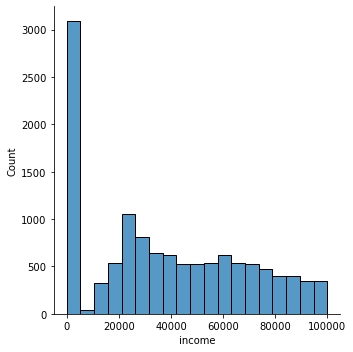

In [113]:
sns.displot(numerical, x="income")

<AxesSubplot:>

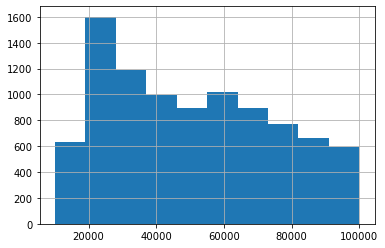

In [114]:
numerical["income"][(numerical["income"]!=0) & (numerical["income"].notnull())].hist()

<AxesSubplot:>

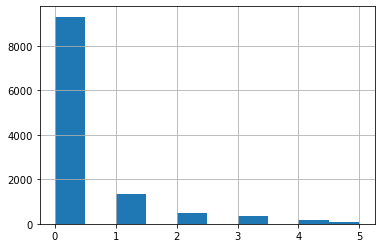

In [115]:
numerical["number_of_open_complaints"][numerical["number_of_open_complaints"].notnull()].hist()

<AxesSubplot:>

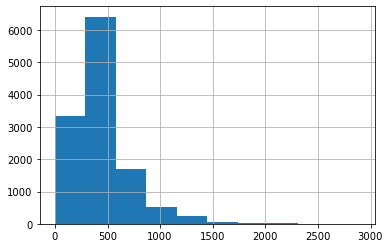

In [116]:
numerical["total_claim_amount"][numerical["total_claim_amount"].notnull()].hist()

**Normalize (numericals)**

**Correlation matrix**

<AxesSubplot:>

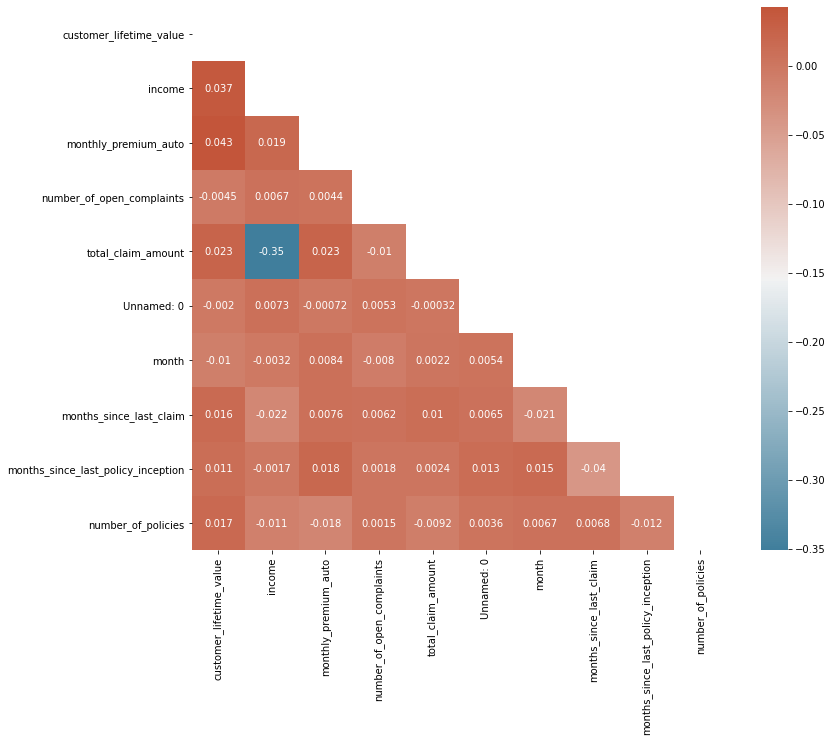

In [154]:
matrix = numerical.corr()
f, ax = plt.subplots(figsize=(12,10))
#mask = np.triu(np.ones_like(matrix, dtype=bool))
#cmap = sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(matrix, annot=True, mask=mask, cmap=cmap)

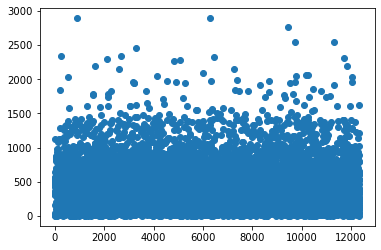

In [146]:
x = np.arange(0, len(data["total_claim_amount"]))
plt.scatter(x, data["total_claim_amount"])

In [155]:
data_for_split = data[["total_claim_amount","income"]]
data_for_split

,total_claim_amount,income
0,2.700000,0.0
1,1131.460000,0.0
2,566.470000,48767.0
3,529.880000,0.0
4,17.270000,36357.0
...,...,...
12968,897.600000,0.0
12969,1214.400000,0.0
12970,273.018929,61146.0
12971,381.306996,39837.0


In [160]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [164]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data["income"], data["total_claim_amount"], test_size=0.30)

X_train

# Compute again the values of the slope and the intercept.
# How do they compare with the previous values?
#reg_new = model.fit(X_train, y_train)

#print("The slope of the regression is: {:.2f}".format(reg_new.coef_[0][0]))
#print("The intercept of the regression is: {:.2f}".format(reg_new.intercept_[0]))

8062         0.0
11179    59207.0
1925     34886.0
1423         0.0
2130     25905.0
          ...   
9094     70037.0
1461     10621.0
7296     41503.0
1998     74243.0
1458     28327.0
Name: income, Length: 8640, dtype: float64

In [165]:
data["income"]

0            0.0
1            0.0
2        48767.0
3            0.0
4        36357.0
          ...   
12968        0.0
12969        0.0
12970    61146.0
12971    39837.0
12972    64195.0
Name: income, Length: 12343, dtype: float64